### Importing Necessary Modules and Libraries

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import f1_score,accuracy_score

* Using pandas to read the database in the same folder
* This dataset is taken from Kaggle

In [2]:
data = pd.read_csv('mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Shape of dataset
data.shape

(60000, 785)

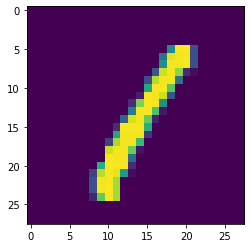

In [4]:
# Extracting data from dataset
a = data.iloc[3,1:].values
# Reshape 
a= a.reshape(28,28).astype('uint8')
# Plotting in matplotlib
plt.imshow(a)

### Exploring and Manipulating Data if needed.

In [5]:
# Checking for Null Values
data.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

There are no null values.

In [6]:
# Checking Datatypes of all columns 
data.dtypes

label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object

######  There is no need of further exploration and pre-processing of data as these are all integers. Also no need of scaling as values are already in range.

### Preparing data to fit model

In [7]:
# Seperating labels and values
x = data.drop(['label'],axis=1)
y = data['label']

In [8]:
# Looking at features and target variable
x.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x.shape

(60000, 784)

In [10]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [11]:
y.shape

(60000,)

In [12]:
# creating training and validation sets 
train_x,test_x,train_y,test_y = tts(x,y,test_size=0.2,random_state=96)

In [13]:
# Checking data
train_x.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
16913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_y.head()

16913    4
3348     9
10621    9
15435    1
884      7
Name: label, dtype: int64

In [15]:
print(train_x.shape)
print(train_y.shape)

(48000, 784)
(48000,)


In [16]:
index = ['Random Forest Classifier','Logistic Regression','SGD Classifier','KNN-Classifier','Decision Tree Classifier','Naive Bayes']
col = ['Accuracy']
model = pd.DataFrame(index=index,columns=col)

### Fitting data to Random Forest Classifier

In [17]:
# Calling classifier
rf = RandomForestClassifier(n_estimators=100)

In [18]:
# fitting data
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# Checking Predictions
pred = rf.predict(test_x)

In [20]:
pred

array([3, 7, 2, ..., 9, 0, 7], dtype=int64)

In [21]:
# Checking f1-score and accuracy
f1 = f1_score(pred,test_y,average='weighted')
print("F1 Score : ",f1)
acc_rf = accuracy_score(pred,test_y)
print("Accuracy : ",acc_rf)

F1 Score :  0.964928336023329
Accuracy :  0.9649166666666666


In [22]:
model.iat[0,0] = acc_rf
model

,Accuracy
Random Forest Classifier,0.964917
Logistic Regression,NaN
SGD Classifier,NaN
KNN-Classifier,NaN
Decision Tree Classifier,NaN
Naive Bayes,NaN


### Fitting Data to Logistic Regression

In [23]:
# Calling classifier
lr = LogisticRegression(random_state=96)

In [24]:
# fitting data
lr.fit(train_x,train_y)

C:\Users\tirth\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=96, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred = lr.predict(test_x)
# Checking f1-score and accuracy
f1 = f1_score(pred,test_y,average='weighted')
print("F1 Score : ",f1)
acc_lr = accuracy_score(pred,test_y)
print("Accuracy : ",acc_lr)

F1 Score :  0.9168671049774859
Accuracy :  0.9166666666666666


In [26]:
model.iat[1,0] = acc_lr
model

,Accuracy
Random Forest Classifier,0.964917
Logistic Regression,0.916667
SGD Classifier,NaN
KNN-Classifier,NaN
Decision Tree Classifier,NaN
Naive Bayes,NaN


### Fitting data to stochastic gradient descent classifier

In [27]:
# Calling classifier
sgd = SGDClassifier(random_state=96)

In [28]:
# fitting data
sgd.fit(train_x,train_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=96, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
pred = sgd.predict(test_x)
# Checking f1-score and accuracy
f1 = f1_score(pred,test_y,average='weighted')
print("F1 Score : ",f1)
acc_sgd = accuracy_score(pred,test_y)
print("Accuracy : ",acc_sgd)

F1 Score :  0.8615397720700836
Accuracy :  0.8595


In [30]:
model.iat[2,0] = acc_sgd
model

,Accuracy
Random Forest Classifier,0.964917
Logistic Regression,0.916667
SGD Classifier,0.8595
KNN-Classifier,NaN
Decision Tree Classifier,NaN
Naive Bayes,NaN


### Fitting Data to KNN-Classifier

In [31]:
# Calling the classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [32]:
# fitting the data
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
pred = knn.predict(test_x)
# Checking f1-score and accuracy
acc_knn = accuracy_score(pred,test_y)
print("Accuracy : ",acc_knn)

Accuracy :  0.9694166666666667


In [34]:
f1 = f1_score(pred,test_y,average='weighted')
print("F1 Score : ",f1)

F1 Score :  0.9694833161633293


In [35]:
model.iat[3,0] = acc_knn
model

,Accuracy
Random Forest Classifier,0.964917
Logistic Regression,0.916667
SGD Classifier,0.8595
KNN-Classifier,0.969417
Decision Tree Classifier,NaN
Naive Bayes,NaN


#### Improving KNN Classifier with Elbow Method 

In [36]:
def Elbow(K):
    error=[]
    for i in K:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_x,train_y)
        tmp = knn.predict(test_x)
        tmp =f1_score(pred,test_y,average='weighted')
        error.append(tmp)
    return error

In [37]:
k=range(1,50)

In [38]:
# Run the elbow function and plot it on Matplotlib. You will get a elbow curve and select the point from where the elbow starts i.e the 
# lowest point and assign it to the n_neighbor 
# train the model again with updated Parameter

### Fitting Data on Decision Tree Classifier 

In [40]:
# calling classifier
dec = DecisionTreeClassifier(random_state=96)

In [41]:
# fitting data
dec.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=96, splitter='best')

In [42]:
pred = dec.predict(test_x)
# Checking f1-score and accuracy
f1 = f1_score(pred,test_y,average='weighted')
print("F1 Score : ",f1)
acc_dec = accuracy_score(pred,test_y)
print("Accuracy : ",acc_dec)

F1 Score :  0.8647155930920106
Accuracy :  0.8645


In [44]:
model.iat[4,0] = acc_dec
model

,Accuracy
Random Forest Classifier,0.964917
Logistic Regression,0.916667
SGD Classifier,0.8595
KNN-Classifier,0.969417
Decision Tree Classifier,0.8645
Naive Bayes,NaN


### Fitting Data with Naive Bayes

####  GaussianNB

In [46]:
# calling classifier 
gnb = GaussianNB()

In [47]:
# fitting data
gnb.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
pred = gnb.predict(test_x)
# Checking f1-score and accuracy
f1 = f1_score(pred,test_y,average='weighted')
print("F1 Score : ",f1)
acc_gnb = accuracy_score(pred,test_y)
print("Accuracy : ",acc_gnb)

F1 Score :  0.6030716988578644
Accuracy :  0.55975


#### MultinomialNB

In [49]:
# calling classifier
mnb = MultinomialNB()

In [50]:
# fitting data
mnb.fit(train_x,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
pred = mnb.predict(test_x)
# Checking f1-score and accuracy
f1 = f1_score(pred,test_y,average='weighted')
print("F1 Score : ",f1)
acc_mnb = accuracy_score(pred,test_y)
print("Accuracy : ",acc_mnb)

F1 Score :  0.8258894421134476
Accuracy :  0.8265833333333333


This model performs better than GaussianNB 

#### BernoulliNB

In [52]:
# calling classifier 
bnb = BernoulliNB()

In [53]:
# fitting data
bnb.fit(train_x,train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [54]:
pred = bnb.predict(test_x)
# Checking f1-score and accuracy
f1 = f1_score(pred,test_y,average='weighted')
print("F1 Score : ",f1)
acc_bnb = accuracy_score(pred,test_y)
print("Accuracy : ",acc_bnb)

F1 Score :  0.831079651325808
Accuracy :  0.8305


Bernoulli Naive Bayes performs the best among all three Naive Bayes Algorithms and hence select this as our result.

In [55]:
model.iat[5,0] = acc_bnb
model

,Accuracy
Random Forest Classifier,0.964917
Logistic Regression,0.916667
SGD Classifier,0.8595
KNN-Classifier,0.969417
Decision Tree Classifier,0.8645
Naive Bayes,0.8305


## KNN-Classifier gives the best result with 96.94% of accuracy among all without tuning its Parameter. We can tune parameters of knn classifier to get better results.